In [ ]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [8]:
filename = "SETSM_s2s041_W2W2_20230406_10300100E36B6F00_10300100E4742A00_2m_seg5_dem.tif"
# "SETSM_s2s041_WV01_20230908_10200100DF26ED00_10200100E155AD00_2m_seg2_dem.tif"
# "SETSM_s2s041_W2W2_20230406_10300100E36B6F00_10300100E4742A00_2m_seg5_dem.tif"
img = rasterio.open(filename)

print(f"The image has {img.count} band")
print(f"The image is {img.width}px by {img.height}px")
width = img.bounds.right-img.bounds.left
height = img.bounds.top-img.bounds.bottom
print(f"Our image covers the world from {img.bounds.left}m to {img.bounds.right}m, left to right and {img.bounds.top}m to {img.bounds.bottom}m top to bottom. It covers a region {width}m width, by {height}m height.")
print(f"The coordinates of the center is {img.xy(img.height // 2, img.width // 2)}")
print(f"The nodata value in the dataset is {img.nodata}")
print(f"The resolution of the image is 1px:{img.res}\n")

print("Metadata:")
print(img.meta)






The image has 1 band
The image is 3090px by 5500px
Our image covers the world from 104714.0m to 110894.0m, left to right and -1347248.0m to -1358248.0m top to bottom. It covers a region 6180.0m width, by 11000.0m height.
The coordinates of the center is (np.float64(107805.0), np.float64(-1352749.0))
The nodata value in the dataset is -9999.0
The resolution of the image is 1px:(2.0, 2.0)

Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 3090, 'height': 5500, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",70],PARAMETER["central_meridian",-45],PARAMETER["false_easting",0],PARAMETER["false_northing",0]

In [ ]:
band = img.read(1)
maskedband = img.read(1, masked=True)
min = maskedband.min()
max = maskedband.max()
mean = maskedband.mean()
dimensions = str(img.width*2) + "mx" + str(img.height*2) + "m"

data = {
    'dimensions': [dimensions], 'max': [max], 'min': [min], 'mean': [mean]
}

df = pd.DataFrame(data)
print(df)


plt.hist(band, cmap="gray")
# plt.colorbar(label='Elevation')
plt.title("Elevation Data")
plt.xlabel('X')
plt.ylabel('Y')




NameError: name 'img' is not defined

Top Image: 
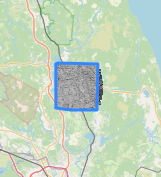
CRS: Left: 3172048, Top: -818382


Bottom Image:
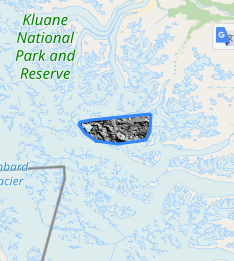
Left: -3268140, Top: 227698